### Training a SVM classisfier on MINST using sklearn
##### Step1: Add module to path if doesn't exist 

TODO: Figure out a better way to do relative import (not path dependant)

##### Step2: Load data

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [70]:
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_mldata
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from src.data.utils import sk_bunch_to_df
np.random.seed = 42

In [3]:
minst_data = fetch_mldata("MNIST original")

c:\program files\python36\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
c:\program files\python36\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


In [4]:
minst_data

{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

(9, 784)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(minst_data['data'], minst_data['target'], test_size=0.2, random_state=42)
print(X_train.shape)

(56000, 784)


##### Step3: Try fitting Linear SVM Classifier
##### Step 4:Try scaling the variables and fit the same thing

PS: Using about 20% of the data set to test out theories and then will use the entire space to search for better models

In [25]:
from sklearn.svm import LinearSVC

svm_linear = LinearSVC(random_state=42)
svm_linear.fit(X_train[:10000],y_train[:10000])

c:\program files\python36\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
     verbose=0)

In [26]:
svm_scaled = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_model",LinearSVC(random_state=42))
    ])
svm_scaled.fit(X_train[:10000],y_train[:10000])

c:\program files\python36\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
c:\program files\python36\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
c:\program files\python36\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_model', LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
     verbose=0))])

In [27]:
y_pred_unscaled = svm_linear.predict(X_train[10000:11000])
y_pred_scaled = svm_scaled.predict(X_train[10000:11000])

c:\program files\python36\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [28]:
from sklearn.metrics import  accuracy_score
y_true = y_train[10000:11000]
score_unscaled = accuracy_score(y_pred= y_pred_unscaled,y_true=y_true)
score_scaled = accuracy_score(y_pred= y_pred_scaled,y_true=y_true)
print("Unscaled Accuracy {:%}".format(score_unscaled))
print("Scaled Accuracy {:%}".format(score_scaled))


Unscaled Accuracy 85.400000%
Scaled Accuracy 85.100000%


Its too close to really tell if scaling helped, will probably just used scaled values. Going to try non linear SVM to see if I can get better performance

In [34]:
from sklearn.svm import SVC
svm_nl = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_model",SVC(gamma='auto',random_state=42,kernel='rbf'))
    ])
svm_nl.fit(X_train[:10000],y_train[:10000])

c:\program files\python36\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
c:\program files\python36\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_model', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False))])

In [41]:
perdicted_nl = svm_nl.predict(X_train[10000:11000])
print('RBF Score {:%}'.format(accuracy_score(y_pred=perdicted_nl,y_true=y_true)))

c:\program files\python36\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


RBF Score 94.400000%


Much better. Maybe just add hyper param tuning

In [49]:
from scipy.stats import reciprocal,uniform
from sklearn.model_selection import RandomizedSearchCV
distribution = {'gamma':reciprocal(0.001,1),'C':uniform(1,10)}
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

svm = SVC(random_state=42,kernel='rbf')
rnd_search_cv = RandomizedSearchCV(svm, distribution, n_iter=10, verbose=2)
rnd_search_cv.fit(X_train_scaled[:10000], y_train[:10000])

c:\program files\python36\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
c:\program files\python36\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
c:\program files\python36\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] C=6.634408500832557, gamma=0.007385095464119488 .................
[CV] .. C=6.634408500832557, gamma=0.007385095464119488, total= 1.2min
[CV] C=6.634408500832557, gamma=0.007385095464119488 .................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.7min remaining:    0.0s


[CV] .. C=6.634408500832557, gamma=0.007385095464119488, total= 1.2min
[CV] C=6.634408500832557, gamma=0.007385095464119488 .................
[CV] .. C=6.634408500832557, gamma=0.007385095464119488, total= 1.2min
[CV] C=3.598544354509269, gamma=0.05701013023982125 ..................
[CV] ... C=3.598544354509269, gamma=0.05701013023982125, total= 1.5min
[CV] C=3.598544354509269, gamma=0.05701013023982125 ..................
[CV] ... C=3.598544354509269, gamma=0.05701013023982125, total= 1.6min
[CV] C=3.598544354509269, gamma=0.05701013023982125 ..................
[CV] ... C=3.598544354509269, gamma=0.05701013023982125, total= 1.5min
[CV] C=9.87623215960638, gamma=0.03949054046028491 ...................
[CV] .... C=9.87623215960638, gamma=0.03949054046028491, total= 1.5min
[CV] C=9.87623215960638, gamma=0.03949054046028491 ...................
[CV] .... C=9.87623215960638, gamma=0.03949054046028491, total= 1.5min
[CV] C=9.87623215960638, gamma=0.03949054046028491 ...................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 54.2min finished


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
          estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=42,
  shrinking=True, tol=0.001, verbose=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000000005E309B0>, 'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000000005E30EB8>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [52]:
print(rnd_search_cv.best_estimator_)
print(rnd_search_cv.best_score_)

<class 'sklearn.svm.classes.SVC'>
0.9389


##### Now we can focus on training the whole set. Just do this overnight. Takes a long time

In [54]:
final_svm= rnd_search_cv.best_estimator_
final_svm.fit(X_train_scaled,y_train)
X_test_scaled=scaler.fit_transform(X_test)
pred_y_minst_final = final_svm.predict(X_test_scaled)
accuracy_final = accuracy_score(pred_y_minst_final,y_test)
print("---------FINAL MODEL-----")
print("Accuracy: {:%}".format(accuracy_final))



c:\program files\python36\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
c:\program files\python36\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


---------FINAL MODEL-----
Accuracy: 87.992857%


### Now the California Housing dataset

In [55]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
X = housing["data"]
y = housing["target"]

In [73]:
frame = pd.DataFrame(data= np.c_[housing['data'], housing['target']],
                      columns= housing['feature_names'] + ['target'])


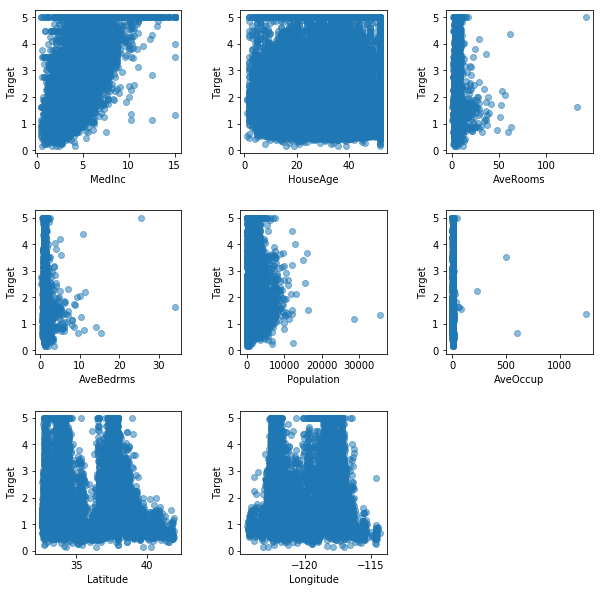

In [118]:
fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
collist = frame.columns[:-1]
for col in range(len(collist)):
    ax=plt.subplot(3, 3, col+1)
    plt.scatter(frame.iloc[:,col],frame.iloc[:,-1],axes = ax,alpha=0.5)
    ax.set_xlabel(collist[col])
    ax.set_ylabel('Target')
    
plt.show()

In [123]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_scaled = scaler.fit_transform(frame.iloc[:,:-1].values)

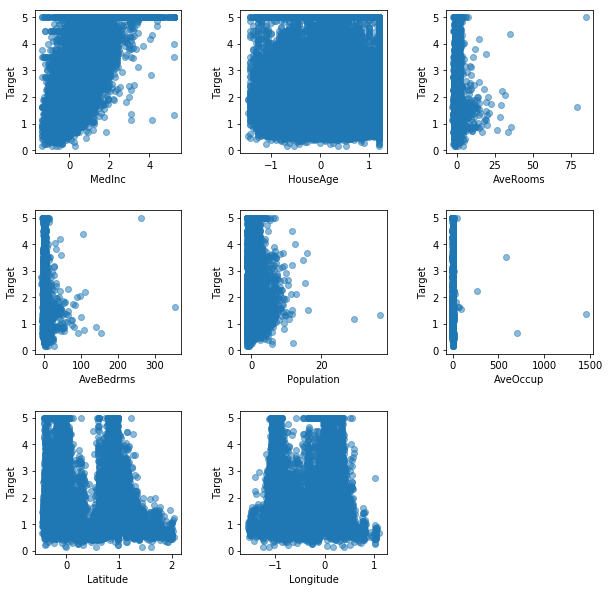

In [125]:
fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for col in range(len(collist)):
    ax=plt.subplot(3, 3, col+1)
    plt.scatter(X_scaled[:,col],frame.iloc[:,-1],axes = ax,alpha=0.5)
    ax.set_xlabel(collist[col])
    ax.set_ylabel('Target')
    
plt.show()

#### Yeah this scaling is no good, lets try removing data thats 5 stdev from the mean for Population, AveOcc, AveBedrooms

In [ ]:
frame